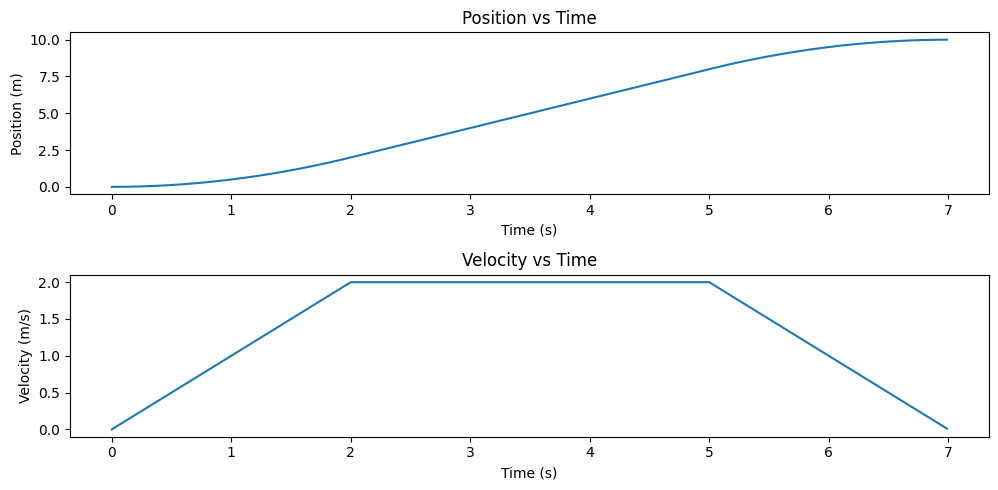

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_motion(l, vmax, amax, dt=0.01):
    # Calculate the time needed to accelerate to vmax
    t_acc = vmax / amax
    # Calculate the distance covered during acceleration/deceleration
    x_acc = 0.5 * amax * t_acc**2

    # Check if the bot can reach vmax
    if 2 * x_acc >= l:
        # If the distance is too short, adjust the velocity and time
        t_acc = np.sqrt(l / amax)
        t_const = 0
        vmax = amax * t_acc
    else:
        # Otherwise, calculate the time spent at vmax
        x_const = l - 2 * x_acc
        t_const = x_const / vmax

    # Total time of motion
    t_total = 2 * t_acc + t_const

    # Generate time vector
    t = np.arange(0, t_total, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)

    for i in range(len(t)):
        if t[i] < t_acc:
            # Acceleration phase
            x[i] = 0.5 * amax * t[i]**2
            v[i] = amax * t[i]
        elif t[i] < t_acc + t_const:
            # Constant velocity phase
            x[i] = x_acc + vmax * (t[i] - t_acc)
            v[i] = vmax
        else:
            # Deceleration phase
            t_dec = t[i] - (t_acc + t_const)
            x[i] = x_acc + vmax * (t_const) - 0.5 * amax * t_dec**2 + v_max * t_dec
            v[i] = vmax - amax * t_dec

    return t, x, v

# Parameters
l = 10.0      # Length of the path
vmax = 2.0    # Maximum velocity
amax = 1.0    # Maximum acceleration
dt = 0.01     # Time step

# Get the motion profile
t, x, v = trapezoidal_motion(l, vmax, amax, dt)

# Plot the results
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

plt.subplot(2, 1, 2)
plt.plot(t, v)
plt.title('Velocity vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')

plt.tight_layout()
plt.show()
